In [8]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("summary_stats.csv")
print(df.head())          # Preview first rows
print(df.describe())      # Summary statistics

   generation  fitness_mean  fitness_min  fitness_max  fitness_std  \
0           0      0.256678     0.035674     0.875173     0.325898   
1           1      0.673204     0.586646     0.875173     0.132220   
2           2      0.630897     0.035674     1.000000     0.280371   
3           3      0.560709     0.035674     0.875173     0.233414   
4           4      0.586646     0.586646     0.586646     0.000000   

   fitness_p5  fitness_p10  fitness_p25  fitness_p75  fitness_p90  \
0    0.035674     0.875173     0.035674     0.035674     0.301194   
1    0.586646     0.875173     0.586646     0.586646     0.803042   
2    0.155158     0.943828     0.274642     0.586646     0.875173   
3    0.155158     0.875173     0.274642     0.586646     0.586646   
4    0.586646     0.586646     0.586646     0.586646     0.586646   

   fitness_p95  unstable_states  n_nets  n_genes  
0     0.875173                6      10        5  
1     0.875173                0      10        5  
2     0.887

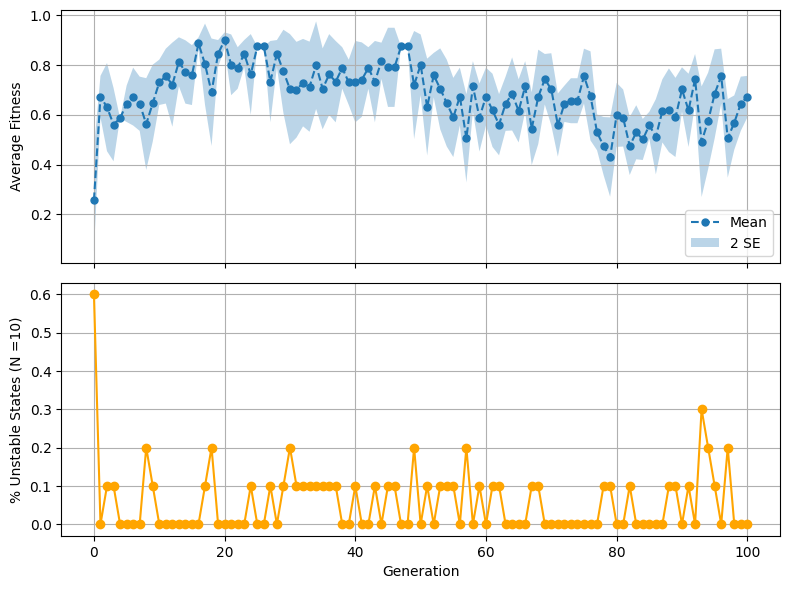

In [19]:
generations = df['generation']
avg_fitness = df['fitness_mean']
std_fitness = df['fitness_std']
n_nets = df['n_nets'][0]
unstable_states = df['unstable_states']
perc_unstable = unstable_states / n_nets

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot 1: Average Fitness with Standard Error
axes[0].plot(generations, avg_fitness, label='Mean', linestyle = '--', marker = 'o', markersize = 5)
axes[0].fill_between(
    generations,
    avg_fitness - 2*std_fitness / np.sqrt(n_nets),
    avg_fitness + 2*std_fitness / np.sqrt(n_nets),
    alpha=0.3,
    label='2 SE'
)
axes[0].set_ylabel("Average Fitness")
axes[0].legend()
axes[0].grid(True)

# Plot 2: Number of Unstable States
axes[1].plot(generations, perc_unstable, label='% Unstable States', marker='o', color='orange')
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("% Unstable States (N =10)")
axes[1].grid(True)

plt.tight_layout()
plt.show()
